In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/Users/nageshjadhav/Desktop/car_evaluation.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=col_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
labels=df['class'].unique().tolist()

In [10]:
lbl_enc=OrdinalEncoder()
for i in col_names:
    df[i]=lbl_enc.fit_transform(df[[i]])

In [11]:
X = df.drop(['class'], axis=1)
y = df['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
entropy_clf = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)

entropy_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [16]:
print('Training Accuracy:', entropy_clf.score(X_train,y_train))
print('Test Accuracy:', entropy_clf.score(X_test,y_test))

Training Accuracy: 0.8193604148660328
Test Accuracy: 0.8371278458844134


[Text(0.4583333333333333, 0.9, 'x[3] <= 0.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.375, 0.7, 'entropy = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5416666666666666, 0.7, 'x[5] <= 0.5\nentropy = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 2.5\nentropy = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.16666666666666666, 0.3, 'x[0] <= 0.5\nentropy = 1.668\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.232\nsamples = 53\nvalue = [51, 0, 2, 0]'),
 Text(0.25, 0.1, 'entropy = 1.88\nsamples = 141\nvalue = [57, 21, 23, 40]'),
 Text(0.5, 0.3, 'x[0] <= 2.5\nentropy = 0.993\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.958\nsamples = 50\nvalue = [31, 0, 19, 0]'),
 Text(0.5833333333333334, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 19, 0]'),
 Text(0.75, 0.5, 'x[5] <= 1.5\nentropy = 1.049\nsamples = 519\nvalue = 

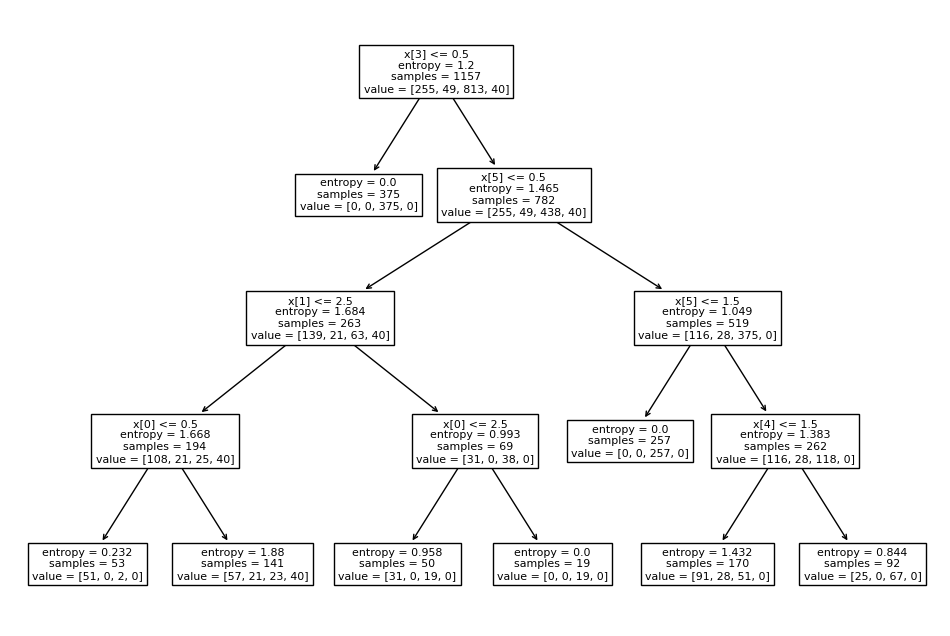

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(entropy_clf.fit(X_train, y_train)) 

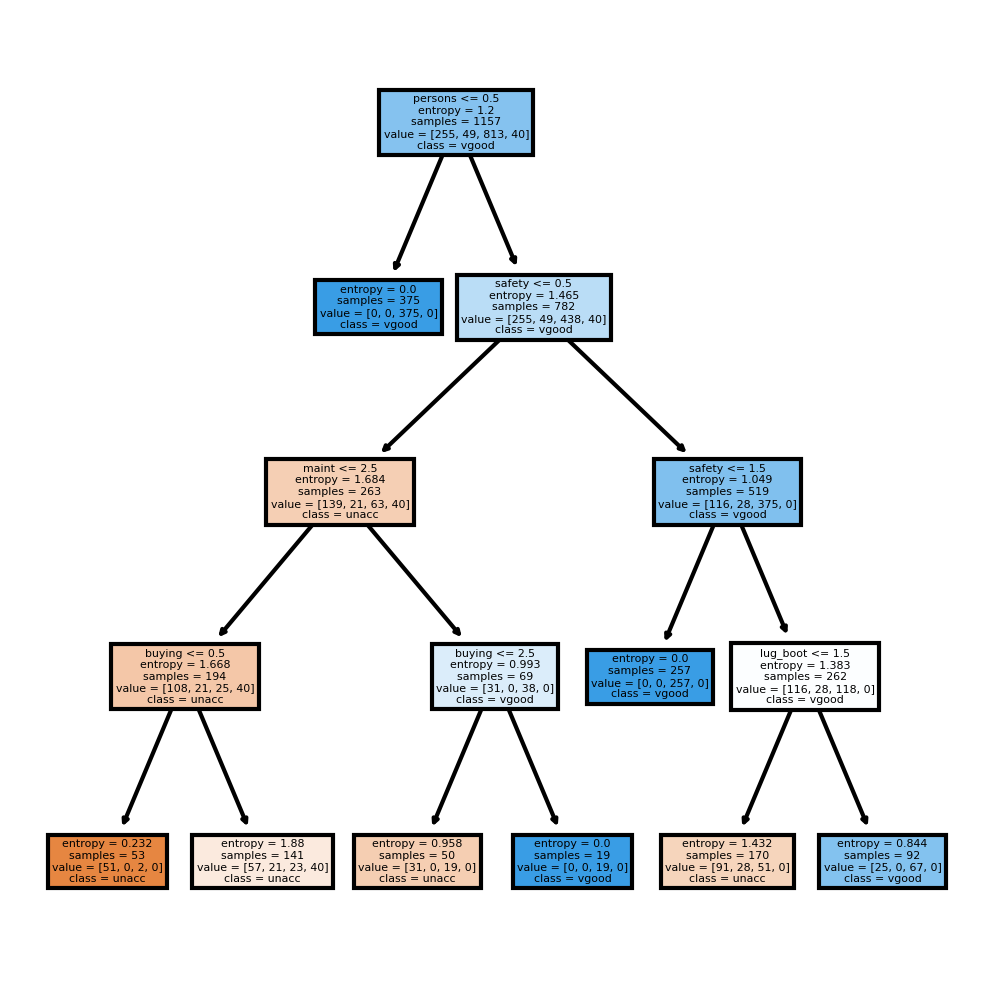

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy_clf,feature_names = col_names,class_names=labels,filled = True);
fig.savefig('imagename.png')

# Samples:

This refers to the number of samples (data points) that reach a particular node during the training process. Each node represents a subset of the data, and "samples" indicates how many instances from the original dataset fall into that subset.
# Values:

This represents the distribution of class labels in the samples that reach a particular node. It shows the count of each class label in the node's subset of data. For classification problems, you'll see a list of values corresponding to each class label.

# For example
if you have a node with "samples=100" and "values=[40, 30, 30]", it means that out of 100 samples that reached this node during training:

40 samples belong to the first class
30 samples belong to the second class
30 samples belong to the third class
